# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata)
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
# Checking the number of mice.
Number_mice = combined_data["Mouse ID"].nunique()
Number_mice

249

In [28]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]["Mouse ID"].unique()


array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID.
combined_data.loc[combined_data["Mouse ID"] == "g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexed_df = combined_data.set_index("Mouse ID")
drop_df = indexed_df.drop("g989",axis=0)
cleaned_df = drop_df.reset_index()
cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [31]:
# Checking the number of mice in the clean DataFrame.
number_mice_cleaned = cleaned_df["Mouse ID"].nunique()
number_mice_cleaned

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
mean = cleaned_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
median = cleaned_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
variance = cleaned_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
st_deviation = cleaned_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
sem = cleaned_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()
sem
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
stat_summary = pd.DataFrame({'Mean Tumor Volume': mean,
                            'Median Tumor Volume' : median,
                            'Tumor Volume Variance': variance,
                            'Tumor Volume Std. Dev.': st_deviation,
                            'Tumor Volume Std. Err.': sem})
stat_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_stat_summary = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var','std','sem'])
agg_stat_summary
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

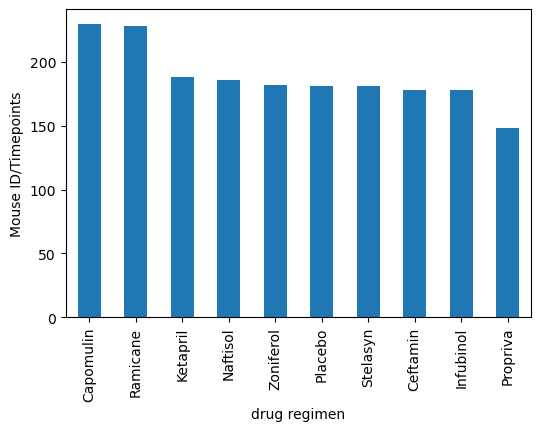

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
group = cleaned_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
bar_plot = group.plot(kind='bar', figsize=(6,4),xlabel='drug regimen',ylabel='Mouse ID/Timepoints')

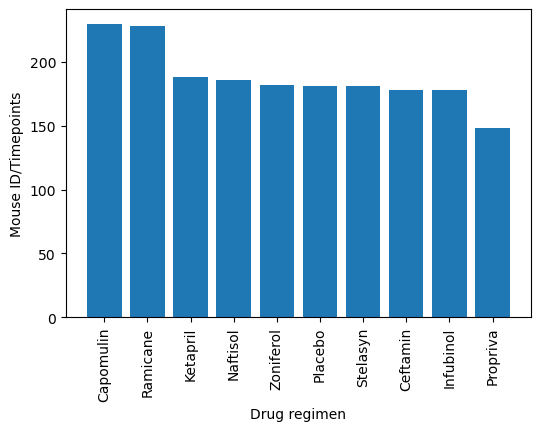

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
group_df = group.reset_index()
x_axis = group_df["Drug Regimen"]
y_axis = group_df["Timepoint"]
plt.figure(figsize=(6,4))
plt.bar(x_axis,y_axis,)
plt.xlabel("Drug regimen")
plt.ylabel("Mouse ID/Timepoints")
plt.xticks(rotation = 'vertical')
plt.show()

Text(0, 0.5, 'Count')

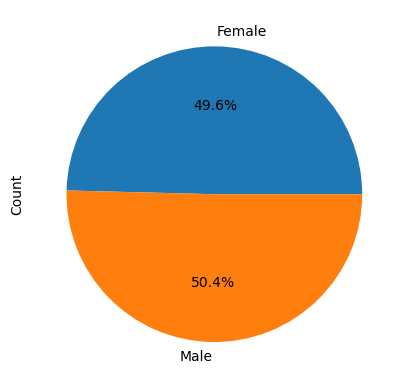

In [36]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
uni_mice_data = cleaned_df.drop_duplicates(subset=['Mouse ID'], keep='first')
uni_df = uni_mice_data.groupby("Sex")["Mouse ID"].count()
pie_plot =uni_df.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel ("Count")
# Make the pie chart


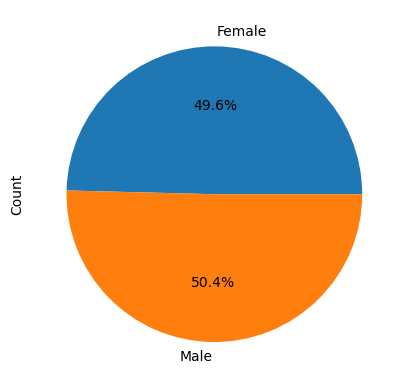

In [37]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
uni_mice_data_df = uni_df.reset_index()
# Make the pie chart
plt.pie(uni_mice_data_df["Mouse ID"],labels=uni_mice_data_df['Sex'],autopct='%1.1f%%')
plt.ylabel ("Count")
plt.show()


## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
new_df =cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(new_df,combined_data,how='left')
merged_df_filtered = merged_df.loc[(merged_df['Drug Regimen']== 'Capomulin')|
                                   (merged_df['Drug Regimen']== 'Ramicane')|
                                   (merged_df['Drug Regimen']== 'Infubinol')|
                                   (merged_df['Drug Regimen']== 'Ceftamin'),:]
merged_df_filtered

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merged_df_filtered["Drug Regimen"].unique()
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_series = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    drug_data = merged_df_filtered[merged_df_filtered['Drug Regimen'] == drug]
    tumor_vol_data = drug_data['Tumor Volume (mm3)']
    tumor_vol_data_series.append((tumor_vol_data))
    #print (tumor_vol_data_series)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.5]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = merged_df_filtered.loc[(merged_df_filtered['Tumor Volume (mm3)']<lower_bound) | (merged_df_filtered['Tumor Volume (mm3)']>upper_bound)]
    print(f'{drug} potential outliers: {outliers['Tumor Volume (mm3)'].values}')  
    print (f'{drug} interquartile range (IQR) : {iqr}')


Infubinol potential outliers: [38.4076183  43.0475426  38.81036633 32.97852192 38.98287774 38.93963263
 72.2267309  36.3213458  38.34200823 33.39765251 37.31123552 40.65900627
 30.48598484 37.07402422 40.1592203  29.12847181 33.56240217 36.37451039
 37.31184577 38.1251644  38.75326548 31.56046955 36.13485243 22.05012627
 41.48300765 38.84687569 30.56462509 28.43096411 33.32909778 31.09533505
 36.56165229 32.37735684 37.22565033 43.41938077 41.58152074 23.34359787
 30.27623175 40.72857787 34.45529799 40.66771292 31.02392294 40.65812366
 39.95234669 43.16637266 36.04104736 28.48403281 44.18345092 31.8962384
 30.63869575]
Infubinol interquartile range (IQR) : 6.116572770000005
Ceftamin potential outliers: [30.48598484 29.12847181 31.56046955 22.05012627 30.56462509 28.43096411
 31.09533505 23.34359787 30.27623175 31.02392294 28.48403281 31.8962384
 30.63869575]
Ceftamin interquartile range (IQR) : 11.129877669999999
Ramicane potential outliers: [67.97341878 65.52574285 62.99935619 57.0318

C:\Users\binod\AppData\Local\Temp\ipykernel_15912\4286924767.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(list(treatments))


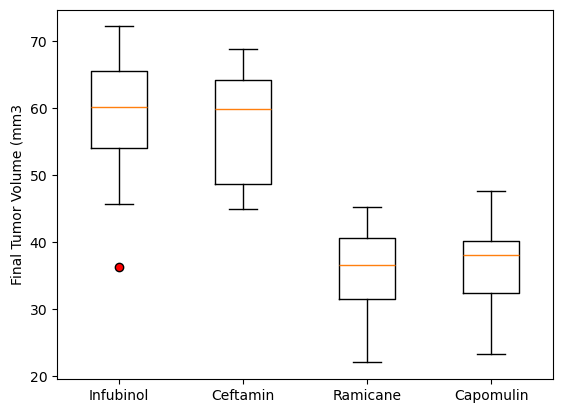

In [45]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.for
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3')
ax1.set_xticklabels(list(treatments))
ax1.boxplot(tumor_vol_data_series, flierprops=dict(markerfacecolor='red', marker='o'))
plt.show()


## Line and Scatter Plots

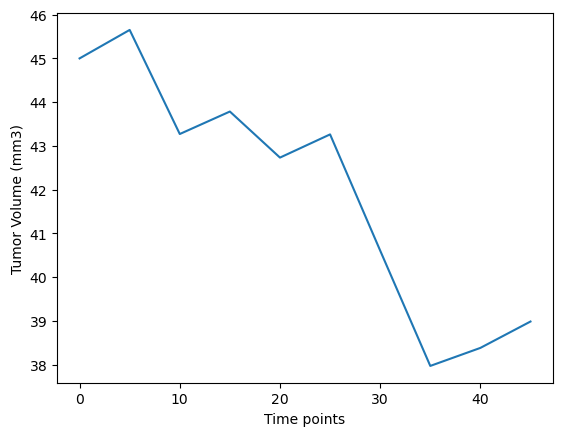

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df = cleaned_df[cleaned_df['Mouse ID']=='b128']
tumor_vol = df['Tumor Volume (mm3)']
time_point = df['Timepoint']
plt.plot(time_point,tumor_vol)
plt.xlabel("Time points")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

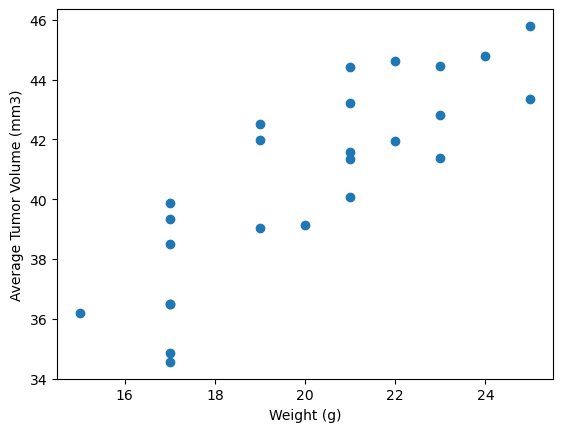

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_data = cleaned_df[cleaned_df["Drug Regimen"]=='Capomulin']
cap_data1 = merged_df_filtered[merged_df_filtered["Drug Regimen"]=='Capomulin']
mouse_weight = cap_data1['Weight (g)'].values
avg_vol = cap_data.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(mouse_weight,avg_vol)

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight,avg_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


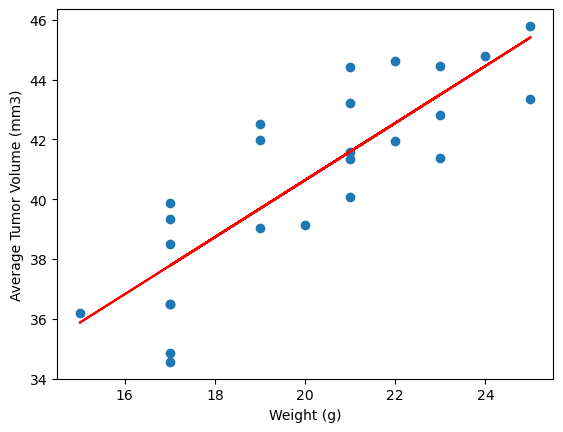

In [19]:
x_values = mouse_weight
y_values = avg_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()